In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns

In [3]:
hmelq=pd.read_csv("hmelq.csv")

In [4]:
hmelq.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


C:\Users\Ayse Akca\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Ayse Akca\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


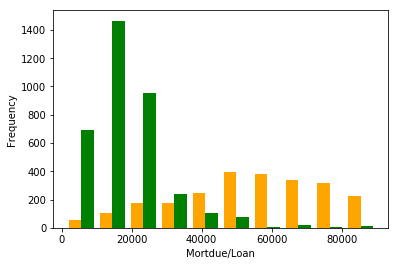

In [5]:
m=hmelq['mortdue']
l=hmelq['loan']
plt.hist([m, l], color=['orange', 'green'])
plt.xlabel("Mortdue/Loan")
plt.ylabel("Frequency")
plt.show()

In [32]:
corr=hmelq.corr()
corr

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1.000000,-0.071523,-0.056226,-0.050254,-0.051532,0.270980,0.345548,-0.150367,0.174759,-0.008981,0.236738
loan,-0.071523,1.000000,0.229546,0.337453,0.123293,-0.001463,-0.021577,0.089030,0.048633,0.092377,0.093636
mortdue,-0.056226,0.229546,1.000000,0.873280,-0.089949,-0.053310,-0.004971,0.141236,0.029452,0.340139,0.167358
value,-0.050254,0.337453,0.873280,1.000000,0.002501,-0.057279,-0.011014,0.182226,-0.005191,0.290439,0.134187
yoj,-0.051532,0.123293,-0.089949,0.002501,1.000000,-0.073500,0.065401,0.184283,-0.067735,0.017809,-0.052290
derog,0.270980,-0.001463,-0.053310,-0.057279,-0.073500,1.000000,0.234706,-0.083755,0.163750,0.048631,0.032324
delinq,0.345548,-0.021577,-0.004971,-0.011014,0.065401,0.234706,1.000000,0.044245,0.081166,0.151996,0.076943
clage,-0.150367,0.089030,0.141236,0.182226,0.184283,-0.083755,0.044245,1.000000,-0.113367,0.221071,-0.042852
ninq,0.174759,0.048633,0.029452,-0.005191,-0.067735,0.163750,0.081166,-0.113367,1.000000,0.097669,0.133751
clno,-0.008981,0.092377,0.340139,0.290439,0.017809,0.048631,0.151996,0.221071,0.097669,1.000000,0.180983


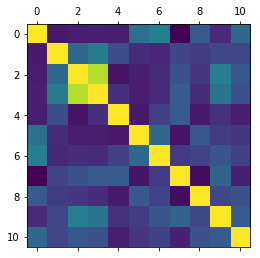

In [7]:
plt.matshow(corr)
plt.show()

In [21]:
hmelq.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [23]:
mortdue_won= pd.notnull(hmelq["mortdue"]) 
value_won= pd.notnull(hmelq["value"]) 
reason_won= pd.notnull(hmelq["reason"]) 
job_won= pd.notnull(hmelq["job"]) 
yoj_won= pd.notnull(hmelq["yoj"]) 
derog_won= pd.notnull(hmelq["derog"]) 
delinq_won= pd.notnull(hmelq["delinq"]) 
clage_won= pd.notnull(hmelq["clage"]) 
ninq_won= pd.notnull(hmelq["ninq"]) 
clno_won= pd.notnull(hmelq["clno"]) 
debtinc_won= pd.notnull(hmelq["debtinc"]) 

In [26]:
hmelq[mortdue_won] 

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327
5,0,17200,39316.0,66978.0,DebtCon,NaN,4.0,0.0,0.0,99.99,1.0,10.0,26.437
6,0,82200,23197.0,110481.0,HomeImp,NaN,26.0,0.0,1.0,127.77,0.0,14.0,30.943
7,0,6200,45356.0,82054.0,DebtCon,NaN,2.0,0.0,0.0,201.33,4.0,29.0,29.662
8,0,17400,113890.0,135146.0,DebtCon,NaN,16.0,0.0,0.0,174.10,1.0,17.0,37.634
9,0,8900,63342.0,78275.0,DebtCon,NaN,19.0,0.0,0.0,162.20,1.0,11.0,32.613


In [43]:
reason_bad=pd.crosstab(index=hmelq["bad"], columns=hmelq["reason"])
reason_bad.index=["Application paid loan","Application defaulted on loan"]
reason_bad

reason,DebtCon,HomeImp
Application paid loan,1931,814
Application defaulted on loan,440,244


In [44]:
bad_count= pd.crosstab(index=hmelq["bad"], columns='count') 
bad_count#count of Application paid loan and Application defaulted on loan

col_0,count
bad,
0,2863
1,713


In [47]:
print(hmelq.sum())#sum of all numeric columns' rows

bad        7.130000e+02
loan       6.626220e+07
mortdue    2.414334e+08
value      3.549822e+08
yoj        2.882975e+04
derog      8.240000e+02
delinq     1.395000e+03
clage      6.108911e+05
ninq       3.883000e+03
clno       7.404900e+04
debtinc    9.503335e+04
dtype: float64


In [48]:
print(hmelq.mean())#mean of all numeric columns' rows

bad             0.199385
loan        18529.697987
mortdue     74013.907992
value      101076.922759
yoj             8.832644
derog           0.261670
delinq          0.432558
clage         179.832529
ninq            1.186373
clno           21.507116
debtinc        33.831737
dtype: float64


In [49]:
print(hmelq.std())#standard deviation of all numeric columns' rows

bad            0.399594
loan       11262.834060
mortdue    44016.833772
value      54865.275351
yoj            7.568046
derog          0.865178
delinq         1.099230
clage         87.066198
ninq           1.728723
clno          10.167490
debtinc        9.061837
dtype: float64


In [50]:
hmelq.describe()# numeric columns description (count,mean,std, etc.)

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,3576.000000,3576.000000,3262.000000,3512.000000,3264.000000,3149.000000,3225.000000,3397.000000,3273.000000,3443.000000,2809.000000
mean,0.199385,18529.697987,74013.907992,101076.922759,8.832644,0.261670,0.432558,179.832529,1.186373,21.507116,33.831737
std,0.399594,11262.834060,44016.833772,54865.275351,7.568046,0.865178,1.099230,87.066198,1.728723,10.167490,9.061837
min,0.000000,1100.000000,2619.000000,8800.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,0.720000
25%,0.000000,11000.000000,46700.250000,65753.000000,3.000000,0.000000,0.000000,115.600000,0.000000,15.000000,29.140000
50%,0.000000,16200.000000,65858.000000,89183.000000,7.000000,0.000000,0.000000,173.640000,1.000000,20.000000,34.747000
75%,0.000000,23100.000000,91717.000000,118928.250000,13.000000,0.000000,0.000000,230.710000,2.000000,26.000000,38.940000
max,1.000000,89900.000000,399550.000000,850000.000000,41.000000,10.000000,15.000000,1168.230000,17.000000,71.000000,203.312000


In [51]:
hmelq.describe(include="all")#includes catagorical values 

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
count,3576.000000,3576.000000,3262.000000,3512.000000,3429,3409,3264.000000,3149.000000,3225.000000,3397.000000,3273.000000,3443.000000,2809.000000
unique,NaN,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,2371,1431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.199385,18529.697987,74013.907992,101076.922759,NaN,NaN,8.832644,0.261670,0.432558,179.832529,1.186373,21.507116,33.831737
std,0.399594,11262.834060,44016.833772,54865.275351,NaN,NaN,7.568046,0.865178,1.099230,87.066198,1.728723,10.167490,9.061837
min,0.000000,1100.000000,2619.000000,8800.000000,NaN,NaN,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,0.720000
25%,0.000000,11000.000000,46700.250000,65753.000000,NaN,NaN,3.000000,0.000000,0.000000,115.600000,0.000000,15.000000,29.140000
50%,0.000000,16200.000000,65858.000000,89183.000000,NaN,NaN,7.000000,0.000000,0.000000,173.640000,1.000000,20.000000,34.747000
75%,0.000000,23100.000000,91717.000000,118928.250000,NaN,NaN,13.000000,0.000000,0.000000,230.710000,2.000000,26.000000,38.940000
